In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [28]:
F = 1
V1 = 5
V2 = 10
cin = 1
A = np.array([[-F/V1,0],[F/V2,-F/V2]])
B = np.array([F/V1,0])
def model(t, c):
    dcdt = A@c + B*cin
    return dcdt

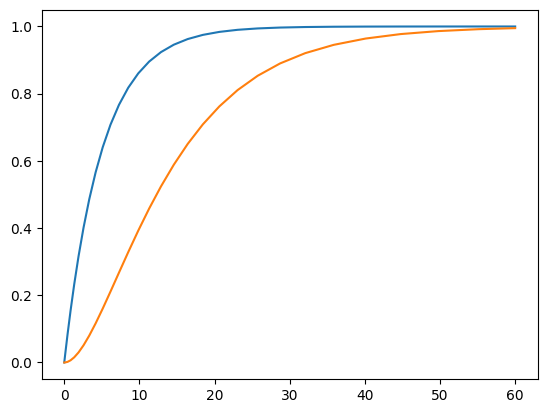

In [29]:
c0 = np.array([0,0])
t_span = [0,60.]
sol = solve_ivp(model, t_span, c0, atol=1e-9, rtol=1e-6)
t = sol.t
c = sol.y.T
plt.figure()
plt.plot(t, c[:,0], label=r'$c_1$')
plt.plot(t, c[:,1], label=r'$c_2$')


In [30]:
def discrete_model(h, tend):
    e1 = np.exp(-F*h/V1)
    e2 = np.exp(-F*h/V2)
    phi = np.array([[e1, 0],
    [V1/(V1-V2)*(e1-e2), e2]])
    gamma = np.array([1-e1, (1/(V1-V2))*(-V1*e1+V2*e2+V1-V2)])
    a11 = phi[0,0]
    a12 = phi[0,1]
    a21 = phi[1,0]
    a22 = phi[1,1]
    beta1 = gamma[0]
    beta2 = gamma[1]
    # Initial time
    ti = 0
    u_k = cin # does not change in this example
    u_kp1 = cin
    y1_k = 0
    y1_kp1 = 0
    y2_k = 0
    y2_kp1 = 0
    ti = 0

    t = [ti]
    y1 = [y1_kp1]
    y2 = [y2_kp1]

    # Loop for each sample
    while ti<tend:
        ti += h
        y1_kp2 = a11*y1_kp1 + beta1*u_kp1
        y2_kp2 = beta2*u_kp1 + (a21*beta1 - a11*beta2)*u_k - (-a11-a22)*y2_kp1 -( -a12*a21 + a11*a22)*y2_k
        t.append(ti)
        y1.append(y1_kp2)
        y2.append(y2_kp2)
        # Shift one sample
        y1_k = y1_kp1
        y1_kp1 = y1_kp2
        y2_k = y2_kp1
        y2_kp1 = y2_kp2
    # Convert lists to np arrays
    t = np.array(t)
    y1 = np.array(y1)
    y2 = np.array(y2)
    return t, y1, y2


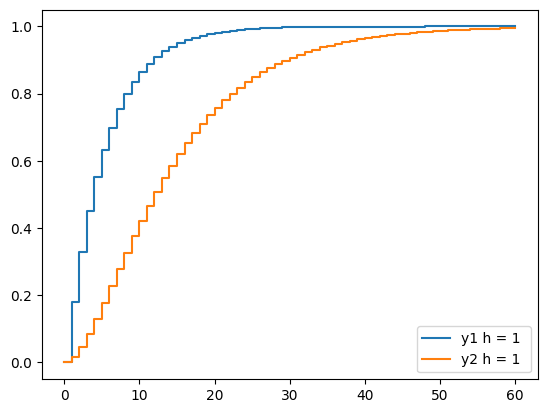

In [31]:
for h in [1]:
    t, y1, y2 = discrete_model(h, 60)
    plt.step(t, y1, where='post', label=f'y1 {h = } ')
    plt.step(t, y2, where='post', label=f'y2 {h = } ')
    plt.legend()